In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

# 데이터 EDA

### 데이터 불러오기

In [3]:
df = pd.read_csv('./data/final_dataset.csv', encoding='EUC-KR') # 각자 경로 따라 수정. 인코딩 필요없을수도있음

### 데이터 기초 정보 확인

In [4]:
df.shape  # 전체 900행으로 나타남

(14811, 16)

In [5]:
df.info() 
# 학점 ~ 봉사까지 전부 int나 float이 아닌 object인 것을 확인할 수 있음. 이는 점수 뒤에 붙은 조사 때문으로 보임
# 학점은 float, 나머지는 int로 변환할 필요가 있음

# 또한 전부 non-null이지만 900행이 아닌 열이 일부 관측됨. 기업분류, 지원분야, 전공 분야에 대한 구체적 확인이 필요함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14811 entries, 0 to 14810
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기업명     14811 non-null  object
 1   지원분야    13780 non-null  object
 2   학교      14809 non-null  object
 3   전공      12564 non-null  object
 4   학점      14811 non-null  object
 5   토익      14811 non-null  object
 6   오픽      14811 non-null  object
 7   토스      14811 non-null  object
 8   자격증     14810 non-null  object
 9   연수      14811 non-null  object
 10  봉사      14811 non-null  object
 11  인턴      14811 non-null  object
 12  업종      14811 non-null  object
 13  업종분류    14811 non-null  int64 
 14  기업규모    14811 non-null  object
 15  규모분류    14811 non-null  int64 
dtypes: int64(2), object(14)
memory usage: 1.8+ MB


In [6]:
df.describe() # int 타입이 아닌 object 타입이라 제대로 값이 산출되지 않음

,업종분류,규모분류
count,14811.000000,14811.000000
mean,10.605563,2.995949
std,5.317633,1.169029
min,1.000000,1.000000
25%,7.000000,2.000000
50%,11.000000,4.000000
75%,14.000000,4.000000
max,19.000000,4.000000


In [7]:
df.isnull().sum() # 빈 행 갯수만큼 각 열에서 null값이 관측됨. 해당 데이터 결측치에 대한 전처리가 필요할 것으로 판단됨.

기업명        0
지원분야    1031
학교         2
전공      2247
학점         0
토익         0
오픽         0
토스         0
자격증        1
연수         0
봉사         0
인턴         0
업종         0
업종분류       0
기업규모       0
규모분류       0
dtype: int64

### 데이터 타입 변경 및 기초 전처리

In [8]:
# 영어점수는 토익, 토익스피킹, 오픽중 하나만 따는 경향이 있음. 따라서 비어있는 경우가 많으므로 세 열을 하나로 합치는게 나을 것으로 보임
# 토익스피킹과 오픽 점수는 토익 점수로 환산이 가능함. 따라서 토익 점수 분류에 따라 토익스피킹과 오픽 점수를 변환함
eng = {'-' : 0, 'Lv1' : 100, 'Lv2' : 200, 'Lv3' : 300, 'Lv4' : 440, 'Lv5' : 600, 'Lv6' : 775, 'Lv7' : 915, 'Lv8' : 975,
       'Level 2' : 200, 'Level 4' : 440, 'Level 5' : 600, 'Level 6' : 775, 'Level 7' : 915, 'Level 8' : 975,
       'AL' : 975, 'AM' : 990, 'AH' : 990,
       'IL' : 440, 'IM': 570, 'IM1' : 570, 'IM2' : 745, 'IM3' : 845, '13' : 845, 'IH' : 915,
       'NL' : 100, 'NH' : 300, 'M1' : 570, 'M2' : 745}
df = df.replace(to_replace=eng)

In [9]:
df.head()
# 확인결과 정상적으로 변환된 것을 알 수 있음. 
#단, 일부 열이 아닌 전체 열에 변환과정을 진행한 것으로 타 행에서 '-'가 0으로 변환되었을 수 있음
# 따라서 추후 시각화 과정에서 다른 열, 특히 회사명~전공 등 str 열에 0값이 나타나는지 확인이 필요함
# 특히 결측치가 확인되었었던 전공, 기업분류, 지원분야 열을 주의깊게 확인

,기업명,지원분야,학교,전공,학점,토익,오픽,토스,자격증,연수,봉사,인턴,업종,업종분류,기업규모,규모분류
0,111,금융영업,동아,경영정보,3.95,790,없음,775,4개,0회,0회,1회,정부/공공기관,14,중소기업,4
1,아워홈,법인영업,대졸4년제,중국어과,3.5,0,0,0,0,1회,0,0,음식료/호텔/리조트/여행,10,중견기업,2
2,아워홈,재무담당자,수도권4년제,중어중문과,3.57,900점,0,975,4개,2회,0,0,음식료/호텔/리조트/여행,10,중견기업,2
3,아워홈,바이오·제약연구원,대학원,화공생명공학과,4.19,800점,0,775,4개,1회,0,1회,음식료/호텔/리조트/여행,10,중견기업,2
4,아워홈,바이오·제약연구원,대학원,화공생명공학과,4.19,800점,0,775,4개,1회,0,1회,음식료/호텔/리조트/여행,10,중견기업,2


In [10]:
# 숫자형 데이터에서 '점', '개', '회' 등을 떼어내는 코드
df['토익'] = df['토익'].str.extract(r'(\d+)')
df['자격증'] = df['자격증'].str.extract(r'(\d+)')
df['연수'] = df['연수'].str.extract(r'(\d+)')
df['봉사'] = df['봉사'].str.extract(r'(\d+)')
df['인턴'] = df['인턴'].str.extract(r'(\d+)')

df = df.fillna(0)
df = df.astype({'기업명':'str', '지원분야':'str', '학교':'str', '전공':'str', '학점' : 'float', '토익':'int32', '자격증':'int32', '연수':'int32', '봉사':'int32', '인턴':'int32', '업종':'str', '업종분류':'str', '기업규모':'str', '규모분류':'str'})

In [11]:
df.info() 
# 정상적으로 데이터 타입이 변경되었음을 확인할 수 있음. 
#단, 아까 우려한 대로 결측치가 사라짐. 해당 결측치들에 0값이 들어갔을것으로 추측됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14811 entries, 0 to 14810
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기업명     14811 non-null  object 
 1   지원분야    14811 non-null  object 
 2   학교      14811 non-null  object 
 3   전공      14811 non-null  object 
 4   학점      14811 non-null  float64
 5   토익      14811 non-null  int32  
 6   오픽      14811 non-null  object 
 7   토스      14811 non-null  object 
 8   자격증     14811 non-null  int32  
 9   연수      14811 non-null  int32  
 10  봉사      14811 non-null  int32  
 11  인턴      14811 non-null  int32  
 12  업종      14811 non-null  object 
 13  업종분류    14811 non-null  object 
 14  기업규모    14811 non-null  object 
 15  규모분류    14811 non-null  object 
dtypes: float64(1), int32(5), object(10)
memory usage: 1.5+ MB


In [12]:
df.describe() 
# 외국어, 해외경험, 인턴, 봉사는 상위 75%값도 눈에띄게 낮으며, 특히 외국어의 경우 상위 75%도 0을 기록함
# 분석에 필수적인 자료가 아닐것으로 판단되므로 제외하는것이 나을것으로 판단됨

,학점,토익,자격증,연수,봉사,인턴
count,14811.000000,14811.000000,14811.000000,14811.000000,14811.000000,14811.000000
mean,3.367209,578.233813,1.447505,0.376139,0.560124,0.328134
std,1.101703,394.902571,1.674650,0.775012,1.174832,0.938244
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.390000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.670000,800.000000,1.000000,0.000000,0.000000,0.000000
75%,3.910000,880.000000,2.000000,1.000000,1.000000,0.000000
max,4.500000,990.000000,16.000000,14.000000,16.000000,11.000000


In [13]:
# 이후 오류가 발생하지 않도록 칼럼명을 영어로 수정해주자. 시각화에서도 한글이면 깨진다.(별도 코딩으로 나오게할순 있음)
df.columns = ['company', 'part', 'university', 'college', 'grade' ,'toeic', 'opic', 'toss', 'license', 'training', 'volunteer', 'intern', 'job', 'jobcode', 'cosize', 'cosizecode']
df.head()

,company,part,university,college,grade,toeic,opic,toss,license,training,volunteer,intern,job,jobcode,cosize,cosizecode
0,111,금융영업,동아,경영정보,3.95,790,없음,775,4,0,0,1,정부/공공기관,14,중소기업,4
1,아워홈,법인영업,대졸4년제,중국어과,3.50,0,0,0,0,1,0,0,음식료/호텔/리조트/여행,10,중견기업,2
2,아워홈,재무담당자,수도권4년제,중어중문과,3.57,900,0,975,4,2,0,0,음식료/호텔/리조트/여행,10,중견기업,2
3,아워홈,바이오·제약연구원,대학원,화공생명공학과,4.19,800,0,775,4,1,0,1,음식료/호텔/리조트/여행,10,중견기업,2
4,아워홈,바이오·제약연구원,대학원,화공생명공학과,4.19,800,0,775,4,1,0,1,음식료/호텔/리조트/여행,10,중견기업,2


In [14]:
# 영어점수를 하나로 취합하여 보는게 나을 것 같다.
df['eng']=df.iloc[:,5:7].max(axis = 1, numeric_only = True)
df=df.drop(['toeic','opic','toss'],axis=1)
df

,company,part,university,college,grade,license,training,volunteer,intern,job,jobcode,cosize,cosizecode,eng
0,111,금융영업,동아,경영정보,3.95,4,0,0,1,정부/공공기관,14,중소기업,4,790
1,아워홈,법인영업,대졸4년제,중국어과,3.50,0,1,0,0,음식료/호텔/리조트/여행,10,중견기업,2,0
2,아워홈,재무담당자,수도권4년제,중어중문과,3.57,4,2,0,0,음식료/호텔/리조트/여행,10,중견기업,2,900
3,아워홈,바이오·제약연구원,대학원,화공생명공학과,4.19,4,1,0,1,음식료/호텔/리조트/여행,10,중견기업,2,800
4,아워홈,바이오·제약연구원,대학원,화공생명공학과,4.19,4,1,0,1,음식료/호텔/리조트/여행,10,중견기업,2,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14806,히타치엘지데이터스토리지코리아,품질관리자,초대졸,전기전자,3.50,0,0,0,0,도매/소매,4,중소기업,4,0
14807,히타치엘지데이터스토리지코리아,품질관리자,서울4년제,기계공,3.31,0,1,0,0,도매/소매,4,중소기업,4,0
14808,히타치엘지데이터스토리지코리아,사무담당자,초대졸,무역,3.62,0,0,0,0,도매/소매,4,중소기업,4,0
14809,히타치엘지데이터스토리지코리아,회계담당자,초대졸,e-비즈니스,3.60,2,0,0,0,도매/소매,4,중소기업,4,0


### 시각화(히스토그램)

#### 시각화 1

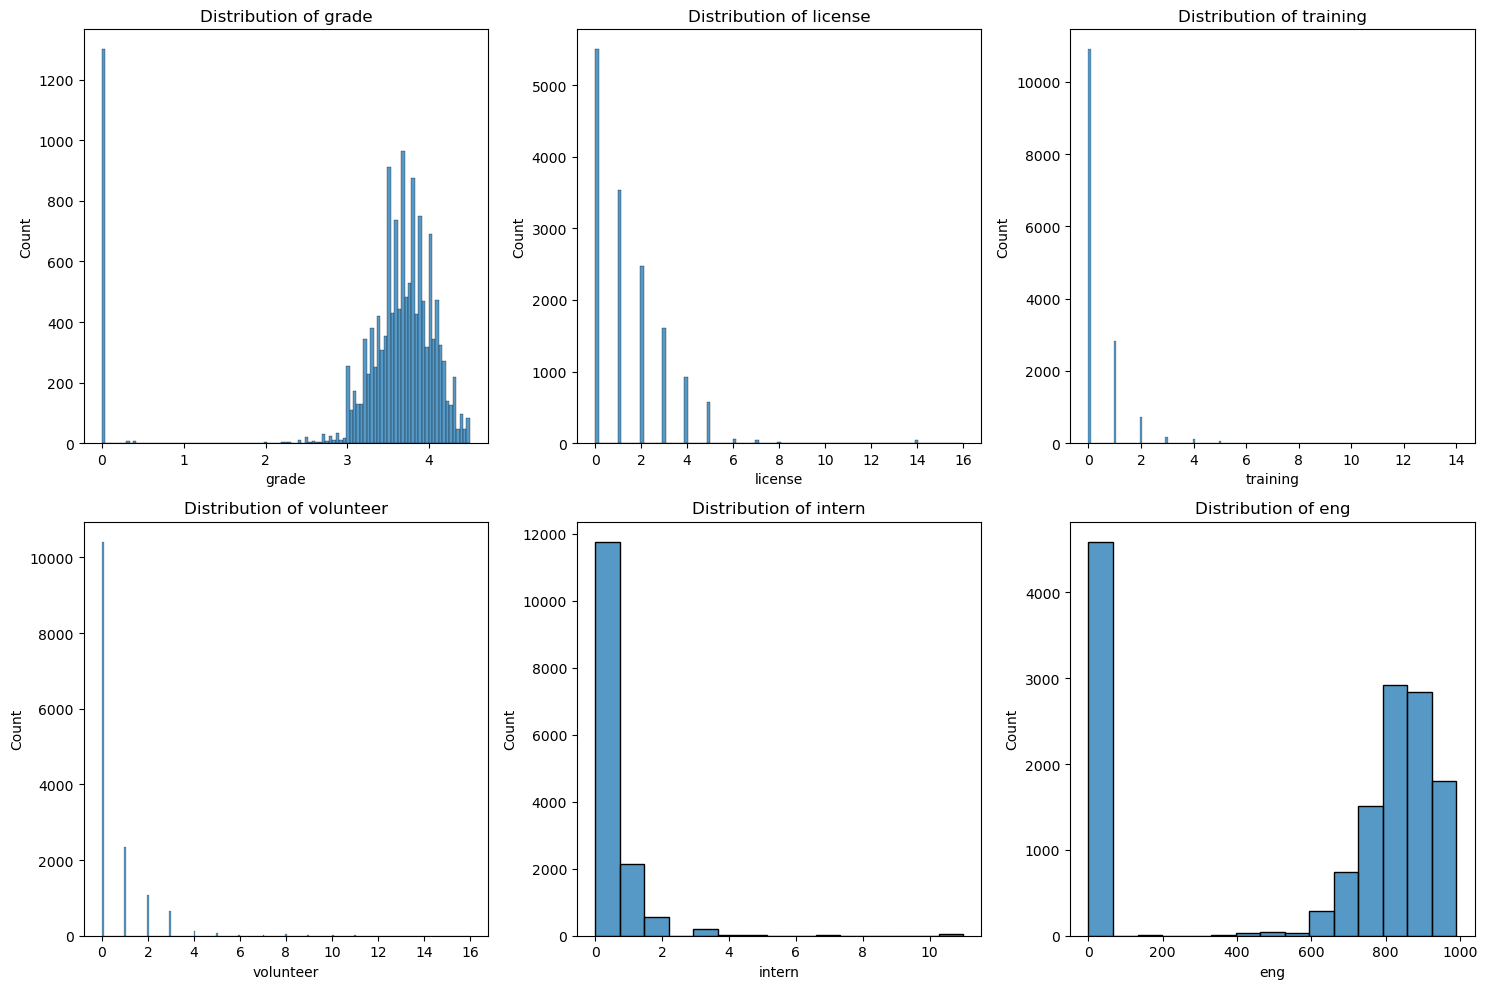

In [15]:
# 수치형 컬럼 분포
num_columns = [col for col in df.columns if df[col].dtype != 'object']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(num_columns):
    sns.histplot(df[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'license'}>],
       [<Axes: title={'center': 'training'}>,
        <Axes: title={'center': 'volunteer'}>],
       [<Axes: title={'center': 'intern'}>,
        <Axes: title={'center': 'eng'}>]], dtype=object)

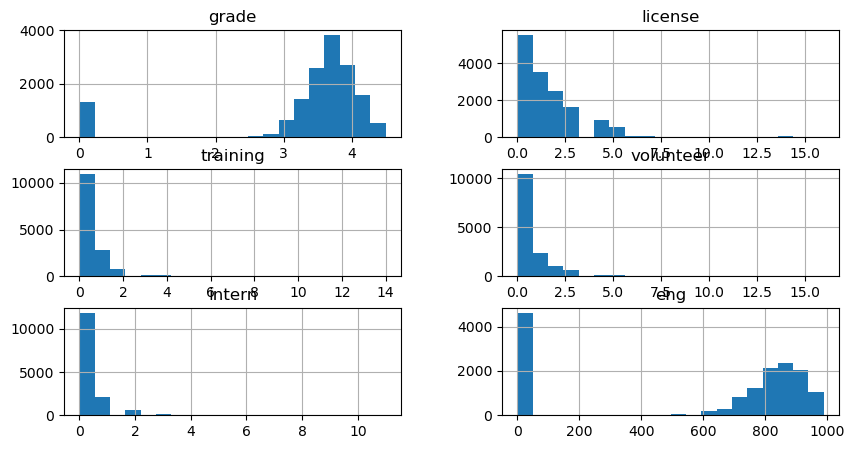

In [16]:
original_df = df
original_df.hist(bins=20, figsize=(10,5))

#### 시각화 2 (박스 플롯)

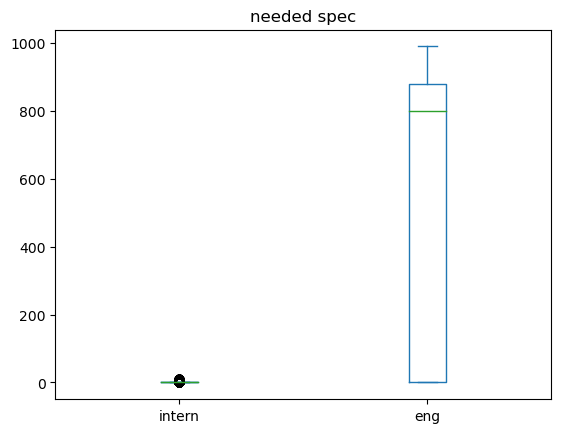

In [17]:
df.iloc[:,8:].plot(kind = 'box');
plt.title ('needed spec')
plt.show();

# 박스플롯으로 출력한 결과 각각의 데이터 범주가 다르고
# 영어점수의 경우 특히 0~1000점 사이에 분포해 있기 때문에 식별을 위해선 minmaxscaler 등을 이용해 값 분포를 0~1사이에 일치시켜야 할 것으로 보임

# 단, 이때 labelencoder로 라벨링된 대학, 계열, 전공값은 정규화가 진행되지 않도록 주의!

#### 추가적인 데이터 EDA 진행

In [18]:
# 1. 학점 이상치 처리

df.loc[df['grade']<1,'grade'] = df['grade'].median()

In [19]:
# 2. 영어 이상치 처리
df.loc[df['eng']<100,'eng'] = df['eng'].median()

array([[<Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'license'}>],
       [<Axes: title={'center': 'training'}>,
        <Axes: title={'center': 'volunteer'}>],
       [<Axes: title={'center': 'intern'}>,
        <Axes: title={'center': 'eng'}>]], dtype=object)

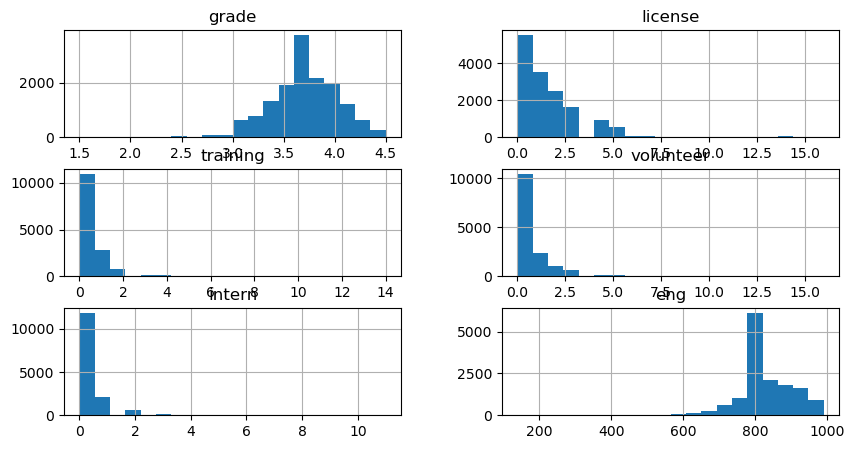

In [20]:
original_df = df
original_df.hist(bins=20, figsize=(10,5))

# 학점과 영어의 이상치가 성공적으로 사라진것을 확인할 수 있다.
# 단 영어점수를 하나로 통일할 때 토익스피킹과 오픽을 레벨에따라 특정값을 부여했더니
# 토익의 평탄화된 정규분포와 합쳐져 중간중간 삐죽삐죽 튀어나오는것을 확인할 수 있다.
# 분석해보고 값이 이상하다면 추가적인 평탄화 작업이 필요할 수 있다.

#### 시각화 4 상관관계 분석 (왜 해야하는지 파악하고 하셔야합니다!)

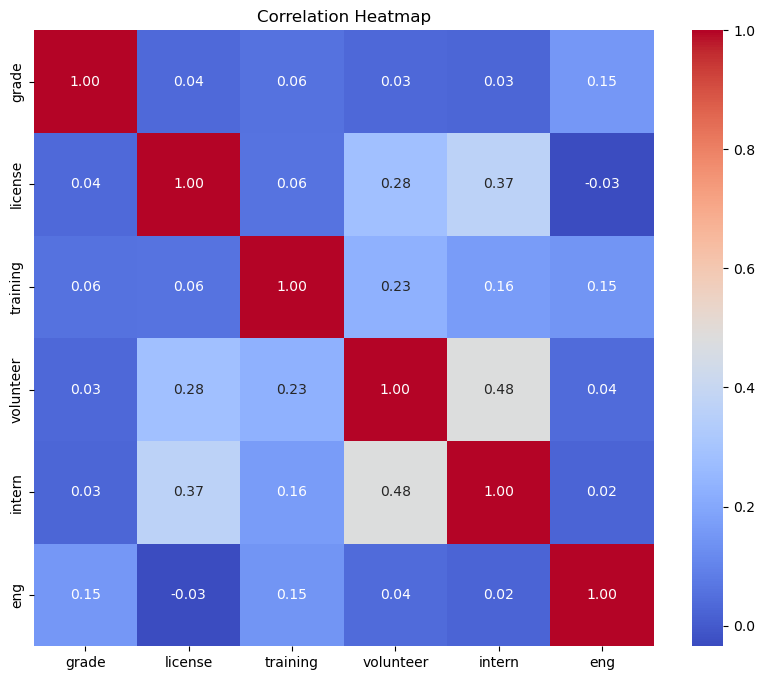

In [21]:
# spec 상관관계
num_columns = [col for col in df.columns if df[col].dtype != 'object']

# 수치형 컬럼 간의 상관 계수 계산
corr = df[num_columns].corr()

plt.figure(figsize=(10, 8))  # 히트맵의 크기 조정
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

-----------------------------------------------------------------

##### 시각화 설정

In [22]:
#깨지는 폰트 설정
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()

rc('font', family=font_name)
rc('axes', unicode_minus=False)

In [23]:
#시각화 경고 무시
import warnings
warnings.filterwarnings('ignore')

##### job과 cosize의 상관관계
1	건설/엔지니어링  
2	광고/미디어/교육  
3	다업종기업/기타  
4	도매/소매  
5	병원  
6	부동산  
7	상사/유통/운송  
8	섬유/패션  
9	은행/증권/보험  
10	음식료/호텔/리조트/여행  
11	의약/화장품/생활화학  
12	자동차/기계/조선  
13	전자/전기  
14	정부/공공기관  
15	제조  
16	제지/가구/기타소비재  
17	제철/금속/비금속재료  
18	통신/IT  
19	화학/정유/에너지  

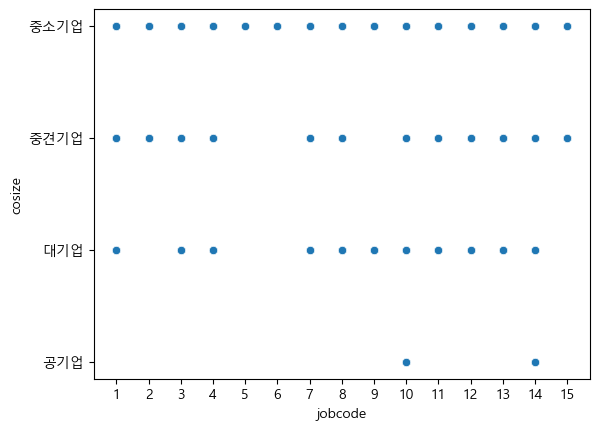

In [24]:
# scatterplot그래프 _ job과 cosize의 상관관계
# 라벨사이즈 길이로 인해 jobcode로 표시
ordered_jobcodes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
df['jobcode'] = pd.Categorical(df['jobcode'], categories=ordered_jobcodes, ordered=True)

sns.scatterplot(data=df, x='jobcode', y='cosize')
plt.show()

##### job에 따른 eng, grade, license 상관관계 

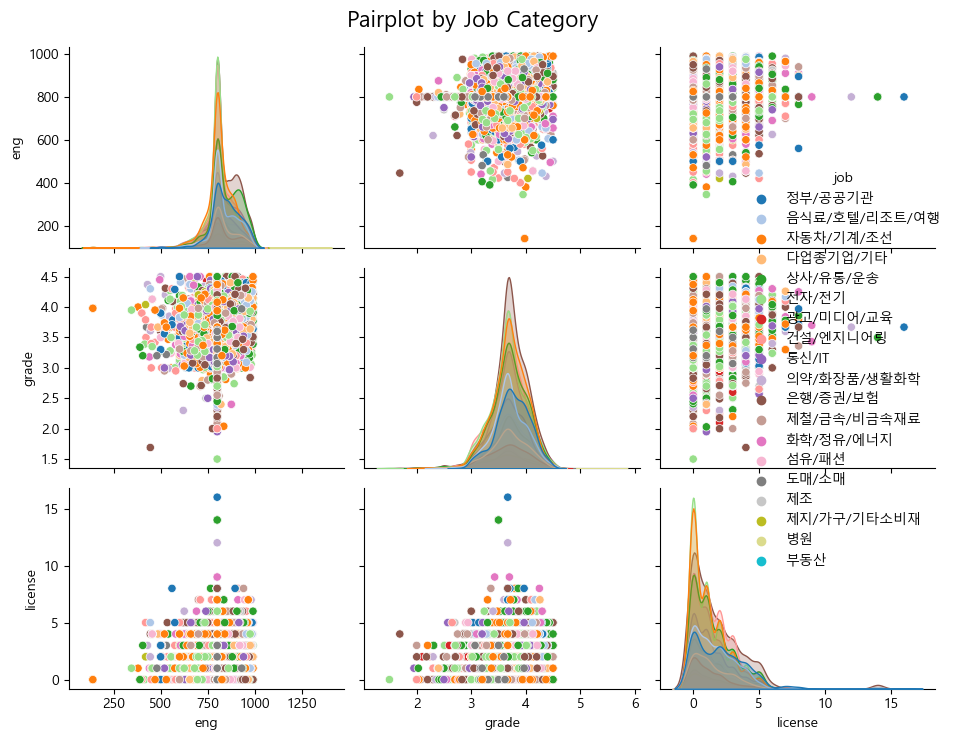

In [25]:
# pairplot 그래프 _ job에 따른 eng, grade, license 상관관계 
sns.pairplot(data=df, vars=['eng', 'grade', 'license'], hue='job', palette='tab20')

plt.suptitle('Pairplot by Job Category', verticalalignment='top', fontsize=16)
plt.tight_layout()
plt.show()

##### job에 따른 training, volunteer, intern 상관관계

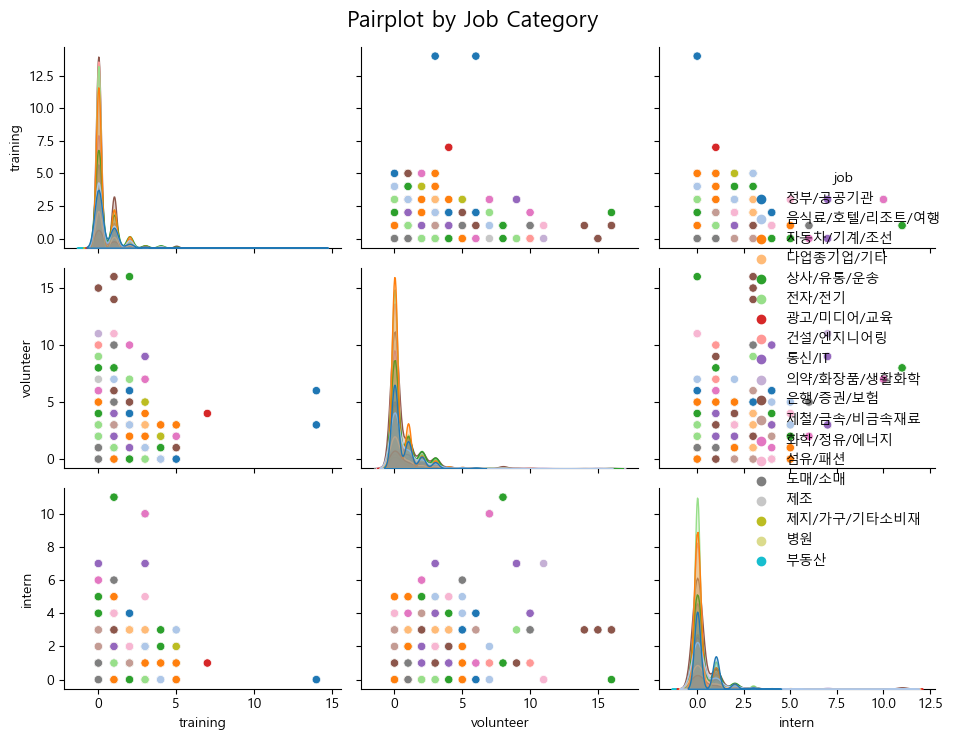

In [27]:
# pairplot 그래프 _ job에 따른 training, volunteer, intern 상관관계 
sns.pairplot(data=df, vars=['training', 'volunteer', 'intern'], hue='job', palette='tab20')

plt.suptitle('Pairplot by Job Category', verticalalignment='top', fontsize=16)
plt.tight_layout()
plt.show()

-----------------------------------------------------------------

## 머신러닝 실행

Logistic Regression  
Decision Tree  
Random Forest  
Gradient Boosting Tree (GBT)  
K-Nearest Neighbor (K-NN)  
Catboost  

##### Decision Tree 의사결정트리 

- "간단한 결정 트리"
- 데이터를 분류하거나 예측하는데 사용되는 비교적 단순한 조건의 연속
- 데이터의 특성(컬럼)을 기반으로 한 일련의 질문과 결정
- 이것은 채소중에 무엇인가? 1:사과다 2: 포도다 3: 딸기다 ...

대/중/소기업 분류 예시로 든다면,   
IF company == 'CompanyA' THEN cosize = 'Large'  
ELSE IF company == 'CompanyB' THEN cosize = 'Medium'  
ELSE cosize = 'Small'  

- 너무 단순하다 -> 데이터의 복잡성이 충분히 담겨있지 않다.
- 너무 복잡하다 -> 과적합 위험이 있다.
- 0.99 사유는? 아마도 너무 단순하다 + 코드의 매칭이 잘 되었다 (대/중/소기업 분류에 적합하다)

In [28]:
# 의사결정트리 실행
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [29]:
# 범주형 데이터를 숫자형으로 변환
df['company'] = df['company'].astype('category').cat.codes
df['part'] = df['part'].astype('category').cat.codes
df['university'] = df['university'].astype('category').cat.codes
df['college'] = df['college'].astype('category').cat.codes
df['university'] = df['university'].astype('category').cat.codes
df['job'] = df['job'].astype('category').cat.codes
df['jobcode'] = df['jobcode'].astype('category').cat.codes
df['cosize'] = df['cosize'].astype('category').cat.codes
df['cosizecode'] = df['cosizecode'].astype('category').cat.codes

In [30]:
# 독립 변수와 종속 변수 분리
X = df[['company']]  # 독립 변수
y = df['cosize']  # 종속 변수

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 의사결정 트리 모델 생성 및 훈련
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = clf.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


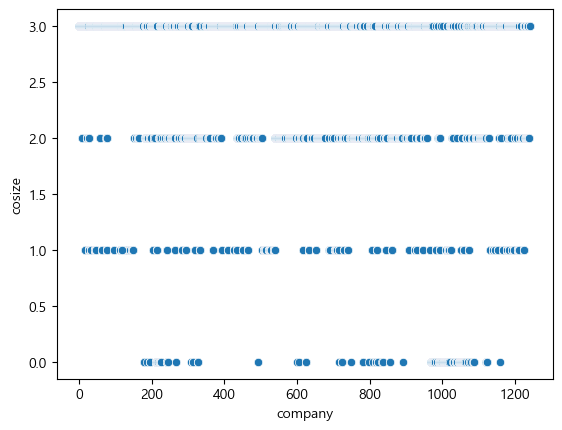

In [31]:
# Accuracy : 0.99 확인용
# scatterplot그래프 _ company과 cosize의 상관관계
# 라벨사이즈 길이로 인해 jobcode로 표시
sns.scatterplot(data=df, x='company', y='cosize')
plt.show()

--------------------------------------------------------------------------------------

In [32]:
# 독립 변수와 종속 변수 분리
X = df[['job']]  # 독립 변수
y = df['eng']  # 종속 변수

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 의사결정 트리 모델 생성 및 훈련
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = clf.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.34


In [33]:
# 독립 변수와 종속 변수 분리
X = df[['part']]  # 독립 변수
y = df['eng']  # 종속 변수

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 의사결정 트리 모델 생성 및 훈련
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = clf.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.33


In [34]:
# 독립 변수와 종속 변수 분리
X = df[['part']]  # 독립 변수
y = df['university']  # 종속 변수

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 의사결정 트리 모델 생성 및 훈련
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = clf.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.22


In [35]:
# 독립 변수와 종속 변수 분리
X = df[['jobcode']]  # 독립 변수
y = df['university']  # 종속 변수

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 의사결정 트리 모델 생성 및 훈련
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = clf.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.15


--------------------------------------------------------------------------------------

##### 오류 CASE

In [ ]:
# 독립 변수와 종속 변수 분리
X = pd.get_dummies(df[['job']])

# 종속 변수
y = df[['eng', 'grade']] # 종속 변수_연속값으로 인식해 오류발생

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 멀티아웃풋 회귀 모델 생성 및 훈련
multioutput_regressor = MultiOutputRegressor(DecisionTreeRegressor(random_state=42))
multioutput_regressor.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = multioutput_regressor.predict(X_test)

# 성능 평가 (예: 평균 제곱 오차)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

##### 성능평가(평균제곱오차) : Mean Squared Error(MSE): 2865.79
- MSE 값이 낮을수록 모델의 예측 성능이 높다고 볼 수 있으며, 높을수록 예측 성능이 낮다고 볼 수 있습니다.
- 일부 문제에서는 MSE가 1이하인 경우가 우수한 성능으로 간주될 수 있으며, 다른 문제에서는 더 높은 값이 허용될 수 있습니다.
- MSE를 줄이는 것은 모델 성능을 개선하는 방향으로의 작업입니다. 
- 하지만 너무 낮은 MSE는 과적합(overfitting)을 의심해 볼 필요도 있습니다.

##### ValueError: continuous-multioutput is not supported
- 멀티아웃풋 회귀 문제에 적합한 MultiOutputRegressor를 사용하여 DecisionTreeRegressor 모델을 각 출력에 대해 별도로 훈련시킵니다. 
- 이 방법은 연속적인 여러 출력을 예측하는 데 적합합니다
- ['eng', 'grade']를 머신은 int 타입의 연속형으로 인식

--------------------------------------------------------------------------------------

##### 결론은 Decision Tree는 object 타입의 단순 분류에 적합한 모델!

--------------------------------------------------------------------------------------

#### 세부 파라미터 조절 (GridSearchCV, RandomSearchCV)를 통해 수치 조절
- 또한 가능하다면, GridSearchCV, RandomSearchCV를 둘다 사용하고 둘중 무엇을 사용하는게 나은지도 설명
        - GridSearchCV는 모든 경우의 수를 고려하여 정확도는 높으나 실행 속도가 느림
        - RandomSearchCV는 일부만 뽑아 실행하여 실행속도가 빠름
        
        
        - ex) 우리가 나중에 목표로 하는건 많은 사람에게 빠른속도로 서비스를 제공하는 것이므로 Random쪽이 적합하다
        - ex) 우리가 최종적으로는 교육과정또한 추천하여 사람들이 적게는 1개월 많게는 6개월 이상의 시간을 투자하게 될텐데 오래걸려도 정확도가 높은쪽이 낫다고 판단된다.

In [ ]:
### 데이터 뎁스가 얕아 파라미터 조절을 시도해보겠지만 의미가 있을지는 잘 모르겠음 ###

### 부트스트랩

- < DecisionTreeClassifier > Accuracy: 0.34 -> 0.33

< DecisionTreeClassifier >

In [36]:
## DecisionTreeClassifier 실행

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# 독립 변수와 종속 변수 분리
X = df[['job']]  # 독립 변수
y = df['eng']  # 종속 변수

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 의사결정 트리 모델 생성 및 훈련
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = clf.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.34


< 교차검증 >

In [38]:
# 분류 대상별 학습 크기가 랜덤
from sklearn.model_selection import cross_val_score,KFold

model = DecisionTreeClassifier()

cv  = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(model, X_train, y_train,cv=cv)
fin_results =  np.mean(results)

type(results)

for i, _  in enumerate(results):
    print('{}번째 교차 검증 정확도 : {} '.format(i,_))
    
print(' 최종  교차 검증 정확도 : {} '.format(fin_results))

0번째 교차 검증 정확도 : 0.3105110896817743 
1번째 교차 검증 정확도 : 0.3423336547733848 
2번째 교차 검증 정확도 : 0.3191899710703954 
3번째 교차 검증 정확도 : 0.32594021215043395 
4번째 교차 검증 정확도 : 0.343297974927676 
5번째 교차 검증 정확도 : 0.33365477338476374 
6번째 교차 검증 정확도 : 0.3056894889103182 
7번째 교차 검증 정확도 : 0.3474903474903475 
8번째 교차 검증 정확도 : 0.3310810810810811 
9번째 교차 검증 정확도 : 0.33494208494208494 
 최종  교차 검증 정확도 : 0.329413067841226 


In [39]:
# 분류 대상별 학습 크기가 동일
from sklearn.model_selection import cross_val_score,StratifiedKFold

model = DecisionTreeClassifier()

cv  = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(model, X_train, y_train,cv=cv)
fin_results =  np.mean(results)

type(results)

for i, _  in enumerate(results):
    print('{}번째 교차 검증 정확도 : {} '.format(i,_))
    
print(' 최종  교차 검증 정확도 : {} '.format(fin_results))

0번째 교차 검증 정확도 : 0.32979749276759884 
1번째 교차 검증 정확도 : 0.32979749276759884 
2번째 교차 검증 정확도 : 0.32883317261330763 
3번째 교차 검증 정확도 : 0.32883317261330763 
4번째 교차 검증 정확도 : 0.32883317261330763 
5번째 교차 검증 정확도 : 0.32883317261330763 
6번째 교차 검증 정확도 : 0.32979749276759884 
7번째 교차 검증 정확도 : 0.3301158301158301 
8번째 교차 검증 정확도 : 0.3301158301158301 
9번째 교차 검증 정확도 : 0.32915057915057916 
 최종  교차 검증 정확도 : 0.3294107408138266 


Defaulting to user installation because normal site-packages is not writeable


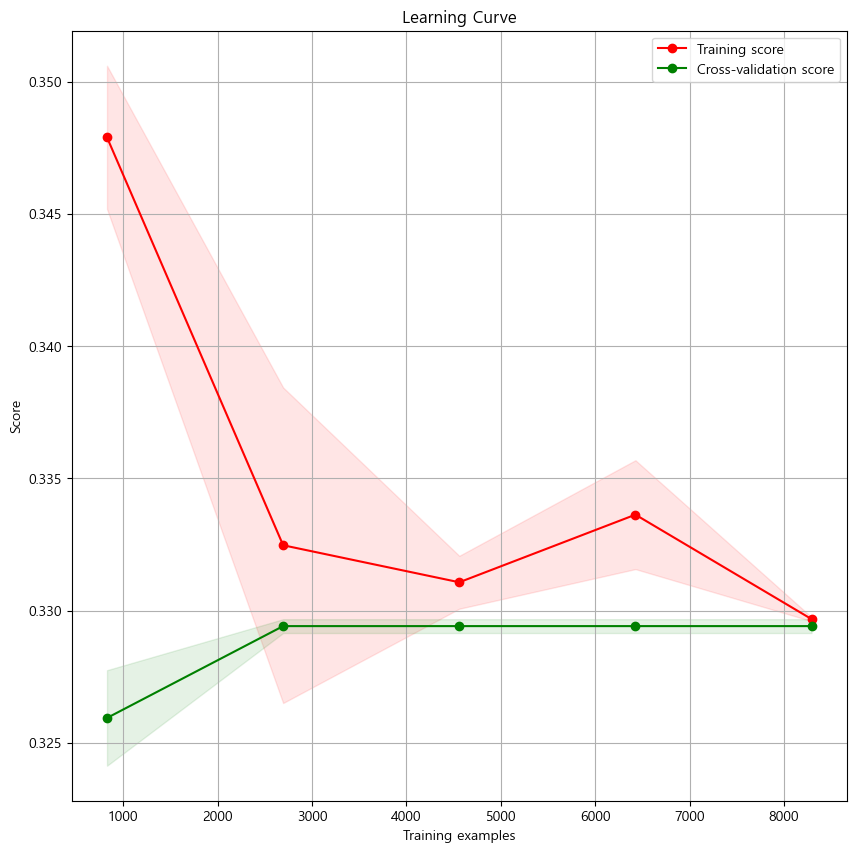

In [43]:
# !pip install scikit_plot
import scikitplot as skplt
skplt.estimators.plot_learning_curve(model, X_train, y_train,figsize=(10,10))
plt.show()

< 세부파라미터 조정 >

In [44]:
## 세부파라미터 조정

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 데이터셋 준비 (이미 X, y 정의된 상태라고 가정)
X = df[['job']]  # 독립 변수
y = df['eng']  # 종속 변수

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 탐색할 하이퍼파라미터 조합 정의
param_dist = {
    'max_depth': [4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42), 
    param_distributions=param_dist, 
    n_iter=10, 
    cv=3, 
    scoring='accuracy', 
    random_state=42
)

# 무작위 탐색을 수행하여 최적의 하이퍼파라미터 조합 찾기
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", random_search.best_params_)

# 최적의 모델로 평가
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Model: {accuracy:.2f}')


Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 8, 'criterion': 'entropy'}
Accuracy with Best Model: 0.34


In [45]:
## 부트스트랩 실행
'''
# 예제 데이터셋 생성 (실제 데이터셋으로 대체 필요)
data = pd.DataFrame({
    'feature': np.random.rand(100),
    'label': np.random.randint(0, 2, 100)
})
'''

# 부트스트랩 설정
n_iterations = 200  # 부트스트랩 반복 횟수
n_size = int(len(df) * 0.7)  # 각 부트스트랩 샘플의 크기 (원본 데이터의 70%)

# 정확도를 저장할 리스트
accuracies = []

# 부트스트랩 샘플링 및 모델 훈련/평가
for _ in range(n_iterations):
    # 부트스트랩 샘플 생성
    sample = df.sample(n=n_size, replace=True)
    X_train, y_train = sample['job'].values.reshape(-1, 1), sample['eng']
    
    # 원본 데이터에서 테스트 세트 생성
    X_test, y_test = df.drop(sample.index)['job'].values.reshape(-1, 1), df.drop(sample.index)['eng']
    
    # 모델 훈련 및 예측
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # 정확도 계산
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# 정확도 결과 집계
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print(f'Accuracy: {accuracy:.2f}')
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Accuracy Std: {std_accuracy:.2f}")

Accuracy: 0.33
Mean Accuracy: 0.33
Accuracy Std: 0.00


##  평가 (RUC/ 커브 그려서 정확도가 얼마나 되는지)

In [46]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
print('Accuracy :',acc)

Accuracy : 0.33297238765565784


In [47]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)

#실제, 예측
cm =confusion_matrix(y_test, pred) 
print('confusion_matrix :\n\n' , cm )

confusion_matrix :

 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


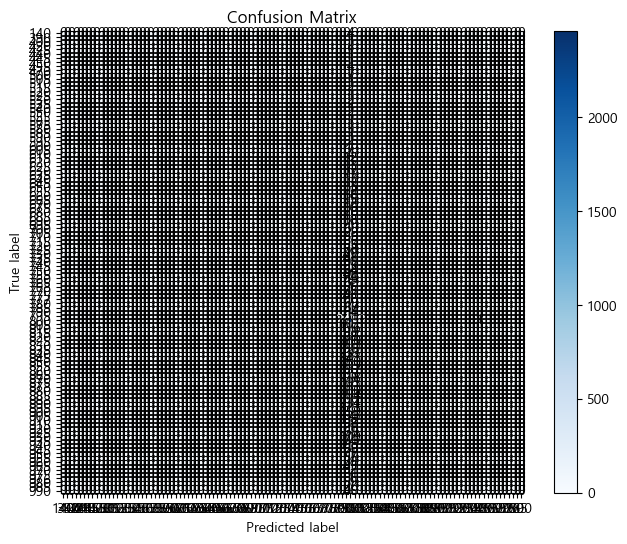

In [48]:
skplt.metrics.plot_confusion_matrix(y_test, pred, figsize = (8,6)) 
plt.show()

오.. 내려놓았습니다

In [49]:
#4-1 정밀도 구하기 
# 다중분류일 경우에는 average= None 
# 기본값은  average= binary 
from sklearn.metrics import precision_score 

pre  = precision_score( y_test, model.predict(X_test) , average= None)

for target,score  in zip(['건설/엔지니어링', '광고/미디어/교육', '다업종기업/기타', '도매/소매', '병원', '부동산', '상사/유통/운송',
                         '섬유/패션','은행/증권/보험','음식료/호텔/리조트/여행', '의약/화장품/생활화학','자동차/기계/조선'
                         '전자/전기', '정부/공공기관', '제조', '제지/가구/기타소비재', '제철/금속/비금속재료'
                         '통신/IT','화학/정유/에너지'], pre):
    print(f"{target}의 정밀도 : {score}")

건설/엔지니어링의 정밀도 : 0.0
광고/미디어/교육의 정밀도 : 0.0
다업종기업/기타의 정밀도 : 0.0
도매/소매의 정밀도 : 0.0
병원의 정밀도 : 0.0
부동산의 정밀도 : 0.0
상사/유통/운송의 정밀도 : 0.0
섬유/패션의 정밀도 : 0.0
은행/증권/보험의 정밀도 : 0.0
음식료/호텔/리조트/여행의 정밀도 : 0.0
의약/화장품/생활화학의 정밀도 : 0.0
자동차/기계/조선전자/전기의 정밀도 : 0.0
정부/공공기관의 정밀도 : 0.0
제조의 정밀도 : 0.0
제지/가구/기타소비재의 정밀도 : 0.0
제철/금속/비금속재료통신/IT의 정밀도 : 0.0
화학/정유/에너지의 정밀도 : 0.0


In [50]:
#4-2 재현율을 구하자.  recall_score: 실제 타켓 클래스 중에 예측이 맞는 비율이다. = 민감도  
 #tp / (tp + fn)
from sklearn.metrics import recall_score

recall  = recall_score( y_test, model.predict(X_test) , average= None)

for target,score  in zip(['건설/엔지니어링', '광고/미디어/교육', '다업종기업/기타', '도매/소매', '병원', '부동산', '상사/유통/운송',
                         '섬유/패션','은행/증권/보험','음식료/호텔/리조트/여행', '의약/화장품/생활화학','자동차/기계/조선'
                         '전자/전기', '정부/공공기관', '제조', '제지/가구/기타소비재', '제철/금속/비금속재료'
                         '통신/IT','화학/정유/에너지'], recall):
    print(f"{target}의 재현률 : {score}")

건설/엔지니어링의 재현률 : 0.0
광고/미디어/교육의 재현률 : 0.0
다업종기업/기타의 재현률 : 0.0
도매/소매의 재현률 : 0.0
병원의 재현률 : 0.0
부동산의 재현률 : 0.0
상사/유통/운송의 재현률 : 0.0
섬유/패션의 재현률 : 0.0
은행/증권/보험의 재현률 : 0.0
음식료/호텔/리조트/여행의 재현률 : 0.0
의약/화장품/생활화학의 재현률 : 0.0
자동차/기계/조선전자/전기의 재현률 : 0.0
정부/공공기관의 재현률 : 0.0
제조의 재현률 : 0.0
제지/가구/기타소비재의 재현률 : 0.0
제철/금속/비금속재료통신/IT의 재현률 : 0.0
화학/정유/에너지의 재현률 : 0.0


In [51]:
from sklearn.metrics import f1_score

f1  = f1_score( y_test, model.predict(X_test) , average= None)

for target,score  in zip(['건설/엔지니어링', '광고/미디어/교육', '다업종기업/기타', '도매/소매', '병원', '부동산', '상사/유통/운송',
                         '섬유/패션','은행/증권/보험','음식료/호텔/리조트/여행', '의약/화장품/생활화학','자동차/기계/조선'
                         '전자/전기', '정부/공공기관', '제조', '제지/가구/기타소비재', '제철/금속/비금속재료'
                         '통신/IT','화학/정유/에너지'], f1):
    print(f"{target}의 F : {score}")

건설/엔지니어링의 F : 0.0
광고/미디어/교육의 F : 0.0
다업종기업/기타의 F : 0.0
도매/소매의 F : 0.0
병원의 F : 0.0
부동산의 F : 0.0
상사/유통/운송의 F : 0.0
섬유/패션의 F : 0.0
은행/증권/보험의 F : 0.0
음식료/호텔/리조트/여행의 F : 0.0
의약/화장품/생활화학의 F : 0.0
자동차/기계/조선전자/전기의 F : 0.0
정부/공공기관의 F : 0.0
제조의 F : 0.0
제지/가구/기타소비재의 F : 0.0
제철/금속/비금속재료통신/IT의 F : 0.0
화학/정유/에너지의 F : 0.0


In [52]:
 # 각 클래스에 대한 확률/ 클래스에  대한 출력은 0과 1사이의 값 , 클래스의 합은  1이다.
proba =model.predict_proba(X_test) 
print("확률 값의 형태: {}".format(proba.shape)) 

#print(proba) #->예측확률

print("합: {}".format(model.predict_proba(X_test)[:5].sum(axis=1))) #행방향으로 합을 구하면 1이 된다.

#skplt.metrics.plot_roc(y_test,proba, figsize=(8,6))
#plt.show()

확률 값의 형태: (7388, 115)
합: [1. 1. 1. 1. 1.]


ValueError: Found input variables with inconsistent numbers of samples: [820068, 849620]

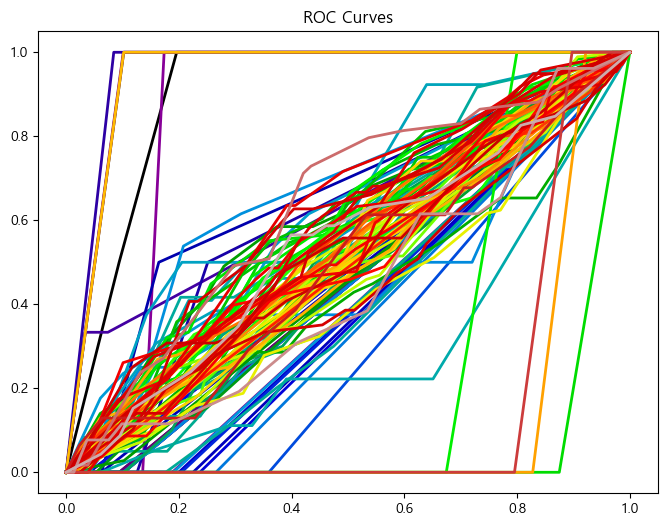

In [53]:
skplt.metrics.plot_roc(y_test,proba, figsize=(8,6))
plt.show()